# Asymptotic Vocabulary

<div class="alert alert-success"> 
Asymptotic behavior of the vocabulary set size necessary to describe an emoji vs number of users
==> How many users does it take to reach a stationary phase for a given emoji?
</div>

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle as pk
import warnings
from pdb import set_trace

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import set_matplotlib_formats
from scipy.spatial import distance

from src.analysis.fraudulous import *
from src.constants import PILOT_0_DIR, PILOT_1_DIR
from src.exploration.form10_eda import plot_emoji_time, read_form, read_meta, str2vocab
from src.selection.distribution import (
    build_trajectory,
    plot_multi_trajectories,
    plot_trajectories,
)

set_matplotlib_formats('retina')
warnings.filterwarnings('ignore')
sns.set()

# Asymptotic Behavior Analysis

In [3]:
asymp_df1 = read_form(PILOT_1_DIR.joinpath("Asymptotic_Emoji_Agreement_1.csv"))

asymp_df1.drop(columns=['👕','🚓','🇵🇱','💱'],inplace=True)
asymp_df2 = read_form(PILOT_1_DIR.joinpath("Asymptotic_Emoji_Agreement_2.csv"))
asymp_df = pd.concat([asymp_df1,asymp_df2],axis=0)

asymp_df = str2vocab(asymp_df)

In [11]:
asymp_df

,😋,🤙,🧓,🌏,😚,🍕,🥊,📍
WorkerID,,,,,,,,
A337Y4X67PY4QI,"[silly, playful, kidding]","[cool, relax, chill]","[granny, old, grey]","[green, earth, world]","[kiss, love, affection]","[pizza, pepperoni, hungry]","[punch, glove, hit]","[lollipop, sweet, sugar]"
A8E99XNOTT390,"[silly, happy, playful]","[chill, cool, hang]","[grandma, old, elderly]","[world, globe, earth]","[kiss, love, affection]","[pizza, food, slice]","[boxing, fight, glove]","[lollipop, microphone, sucker]"
A2L6M8DR6VF9P1,"[sweet, okay, humble]","[wow, won, victory]","[grandmother, oldage, agedpeople]","[world, earth, universe]","[kiss, love, care]","[snack, pizza, eat]","[boxing, fight, sport]","[pin, points, lollipop]"
A2OPYRV3GLAPS1,"[happy, smug, cheeky]","[cool, dude, whoa]","[innocent, boring, tidy]","[world, earth, planet]","[whistling, blushing, cute]","[pizza, slice, food]","[punch, boxing, glove]","[lollipop, candy, sweet]"
A3FPKH2F4IACUQ,"[silly, funny, sweet]","[shaka, cool, agree]","[grandpa, grandma, old]","[earth, world, planet]","[kiss, smooch, flirt]","[pizza, food, snack]","[box, mit, glove]","[pin, marker, location]"
...,...,...,...,...,...,...,...,...
A1X84T4EFW04GZ,"[silly, goofy, happy]","[chill, cool, collected]","[old, elderly, woman]","[world, earth, planet]","[kiss, smooch, affection]","[pizza, slice, italian]","[glove, boxing, punch]","[pin, point, spot]"
A24WC24X9TIUBF,"[silly, playful, funny]","[cool, radical, awesome]","[old, elderly, wise]","[earthly, green, grounded]","[kisses, love, intimacy]","[delicious, eating, hungry]","[fighting, sporty, winning]","[positioning, located, found]"
A276TOSEU7TQ8Y,"[yummy, hungry, happy]","[radical, chilling, hanging]","[elderly, grandma, grey]","[world, earth, planet]","[smooches, kisses, loves]","[lunch, pizza, slice]","[punch, boxing, glove]","[lollipop, lolli, candy]"


😋

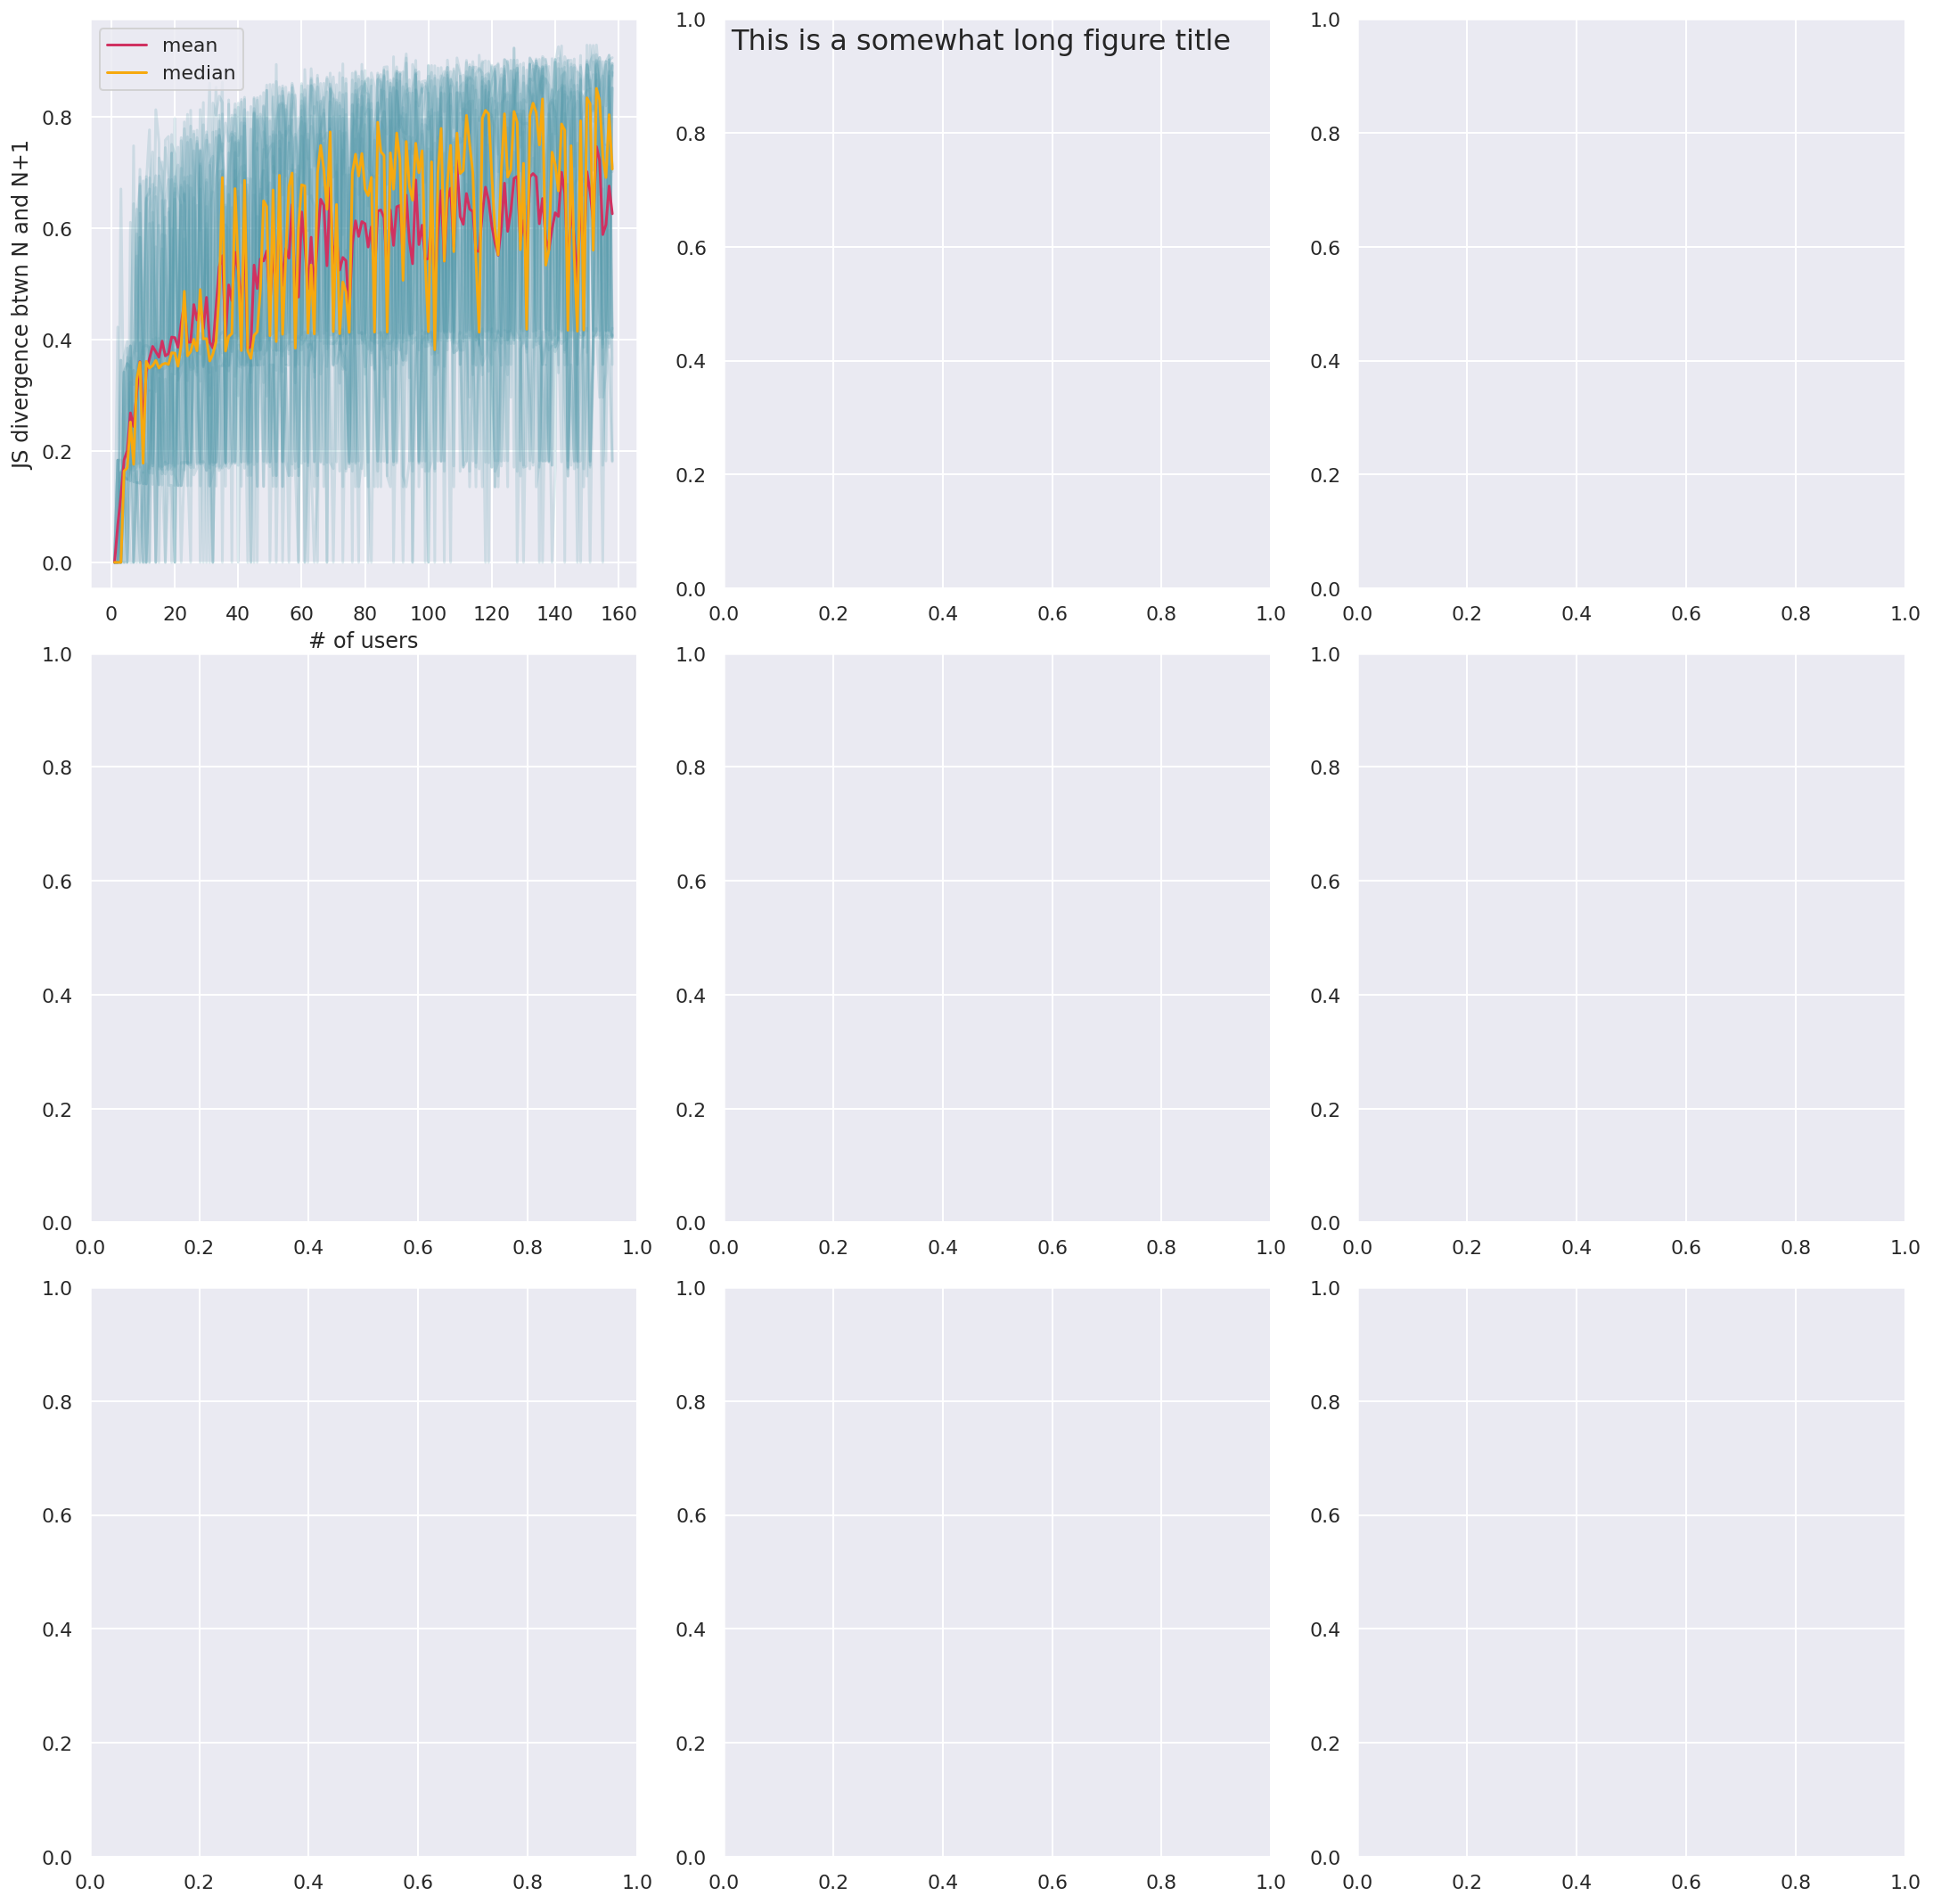

In [6]:
plot_multi_trajectories(asymp_df,rand_norm_traj=True)

😋🤙

KeyboardInterrupt: 

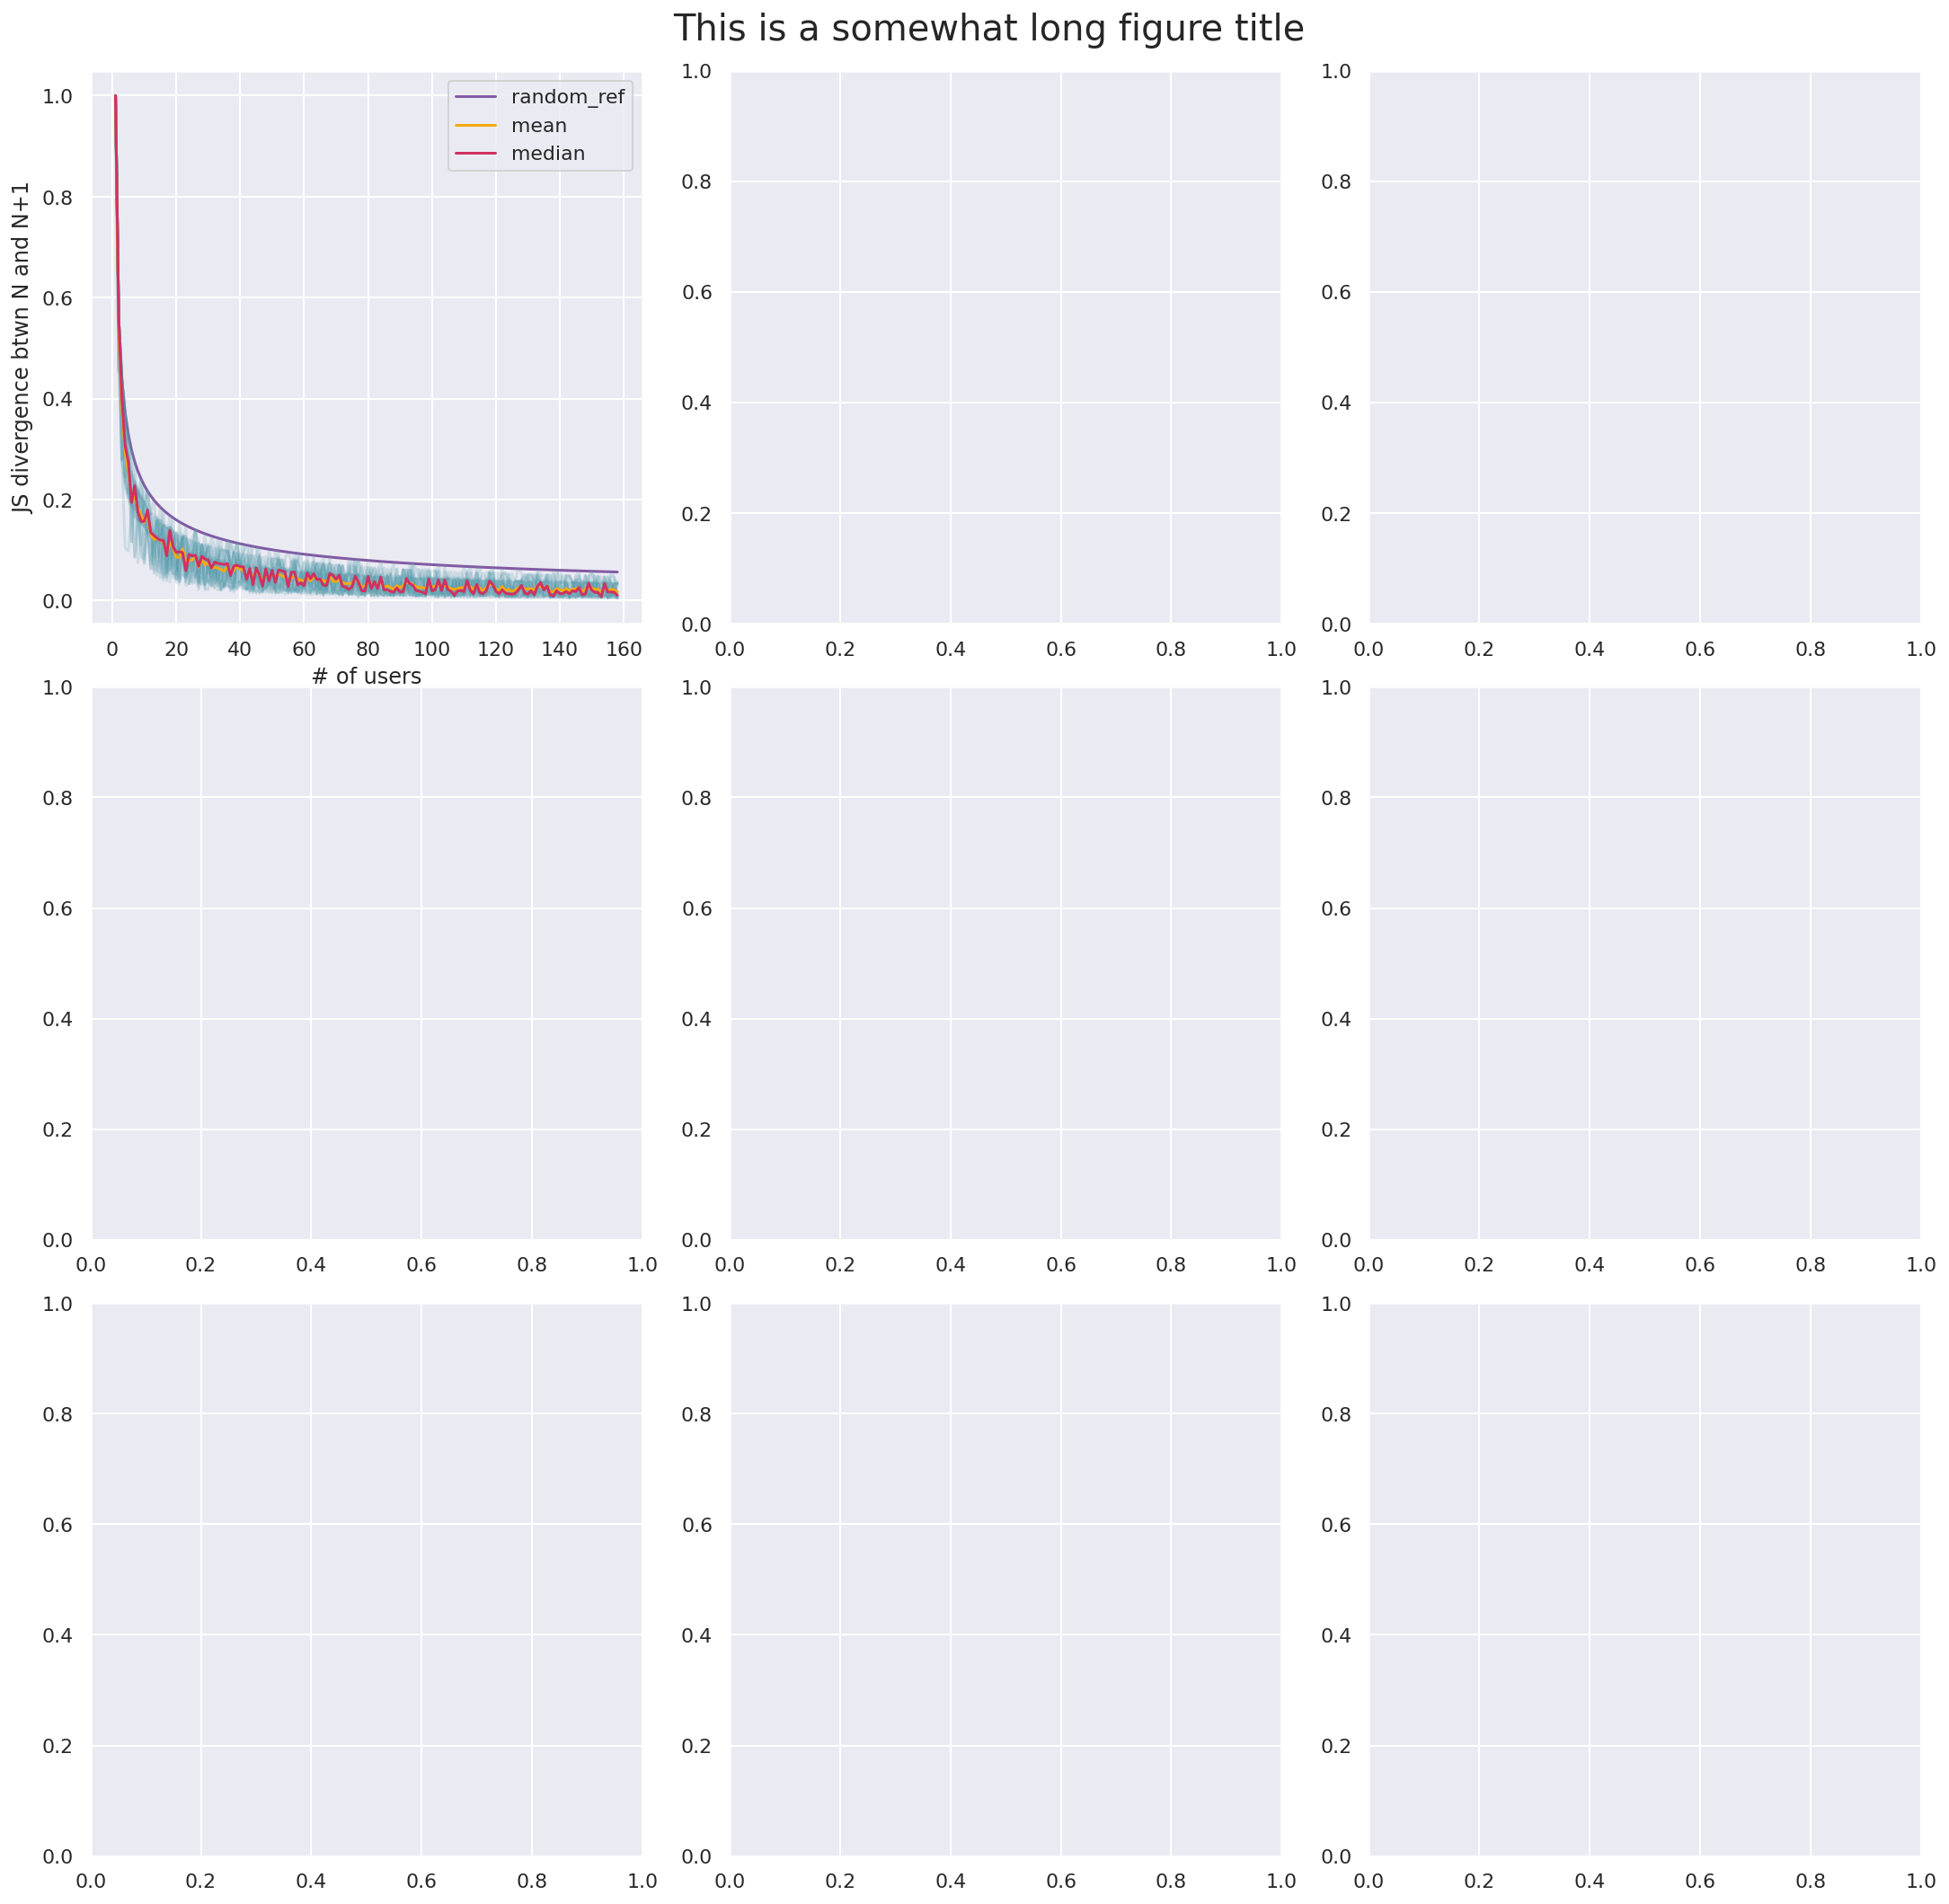

In [10]:
plot_multi_trajectories(asymp_df,log_scale=False)

😋

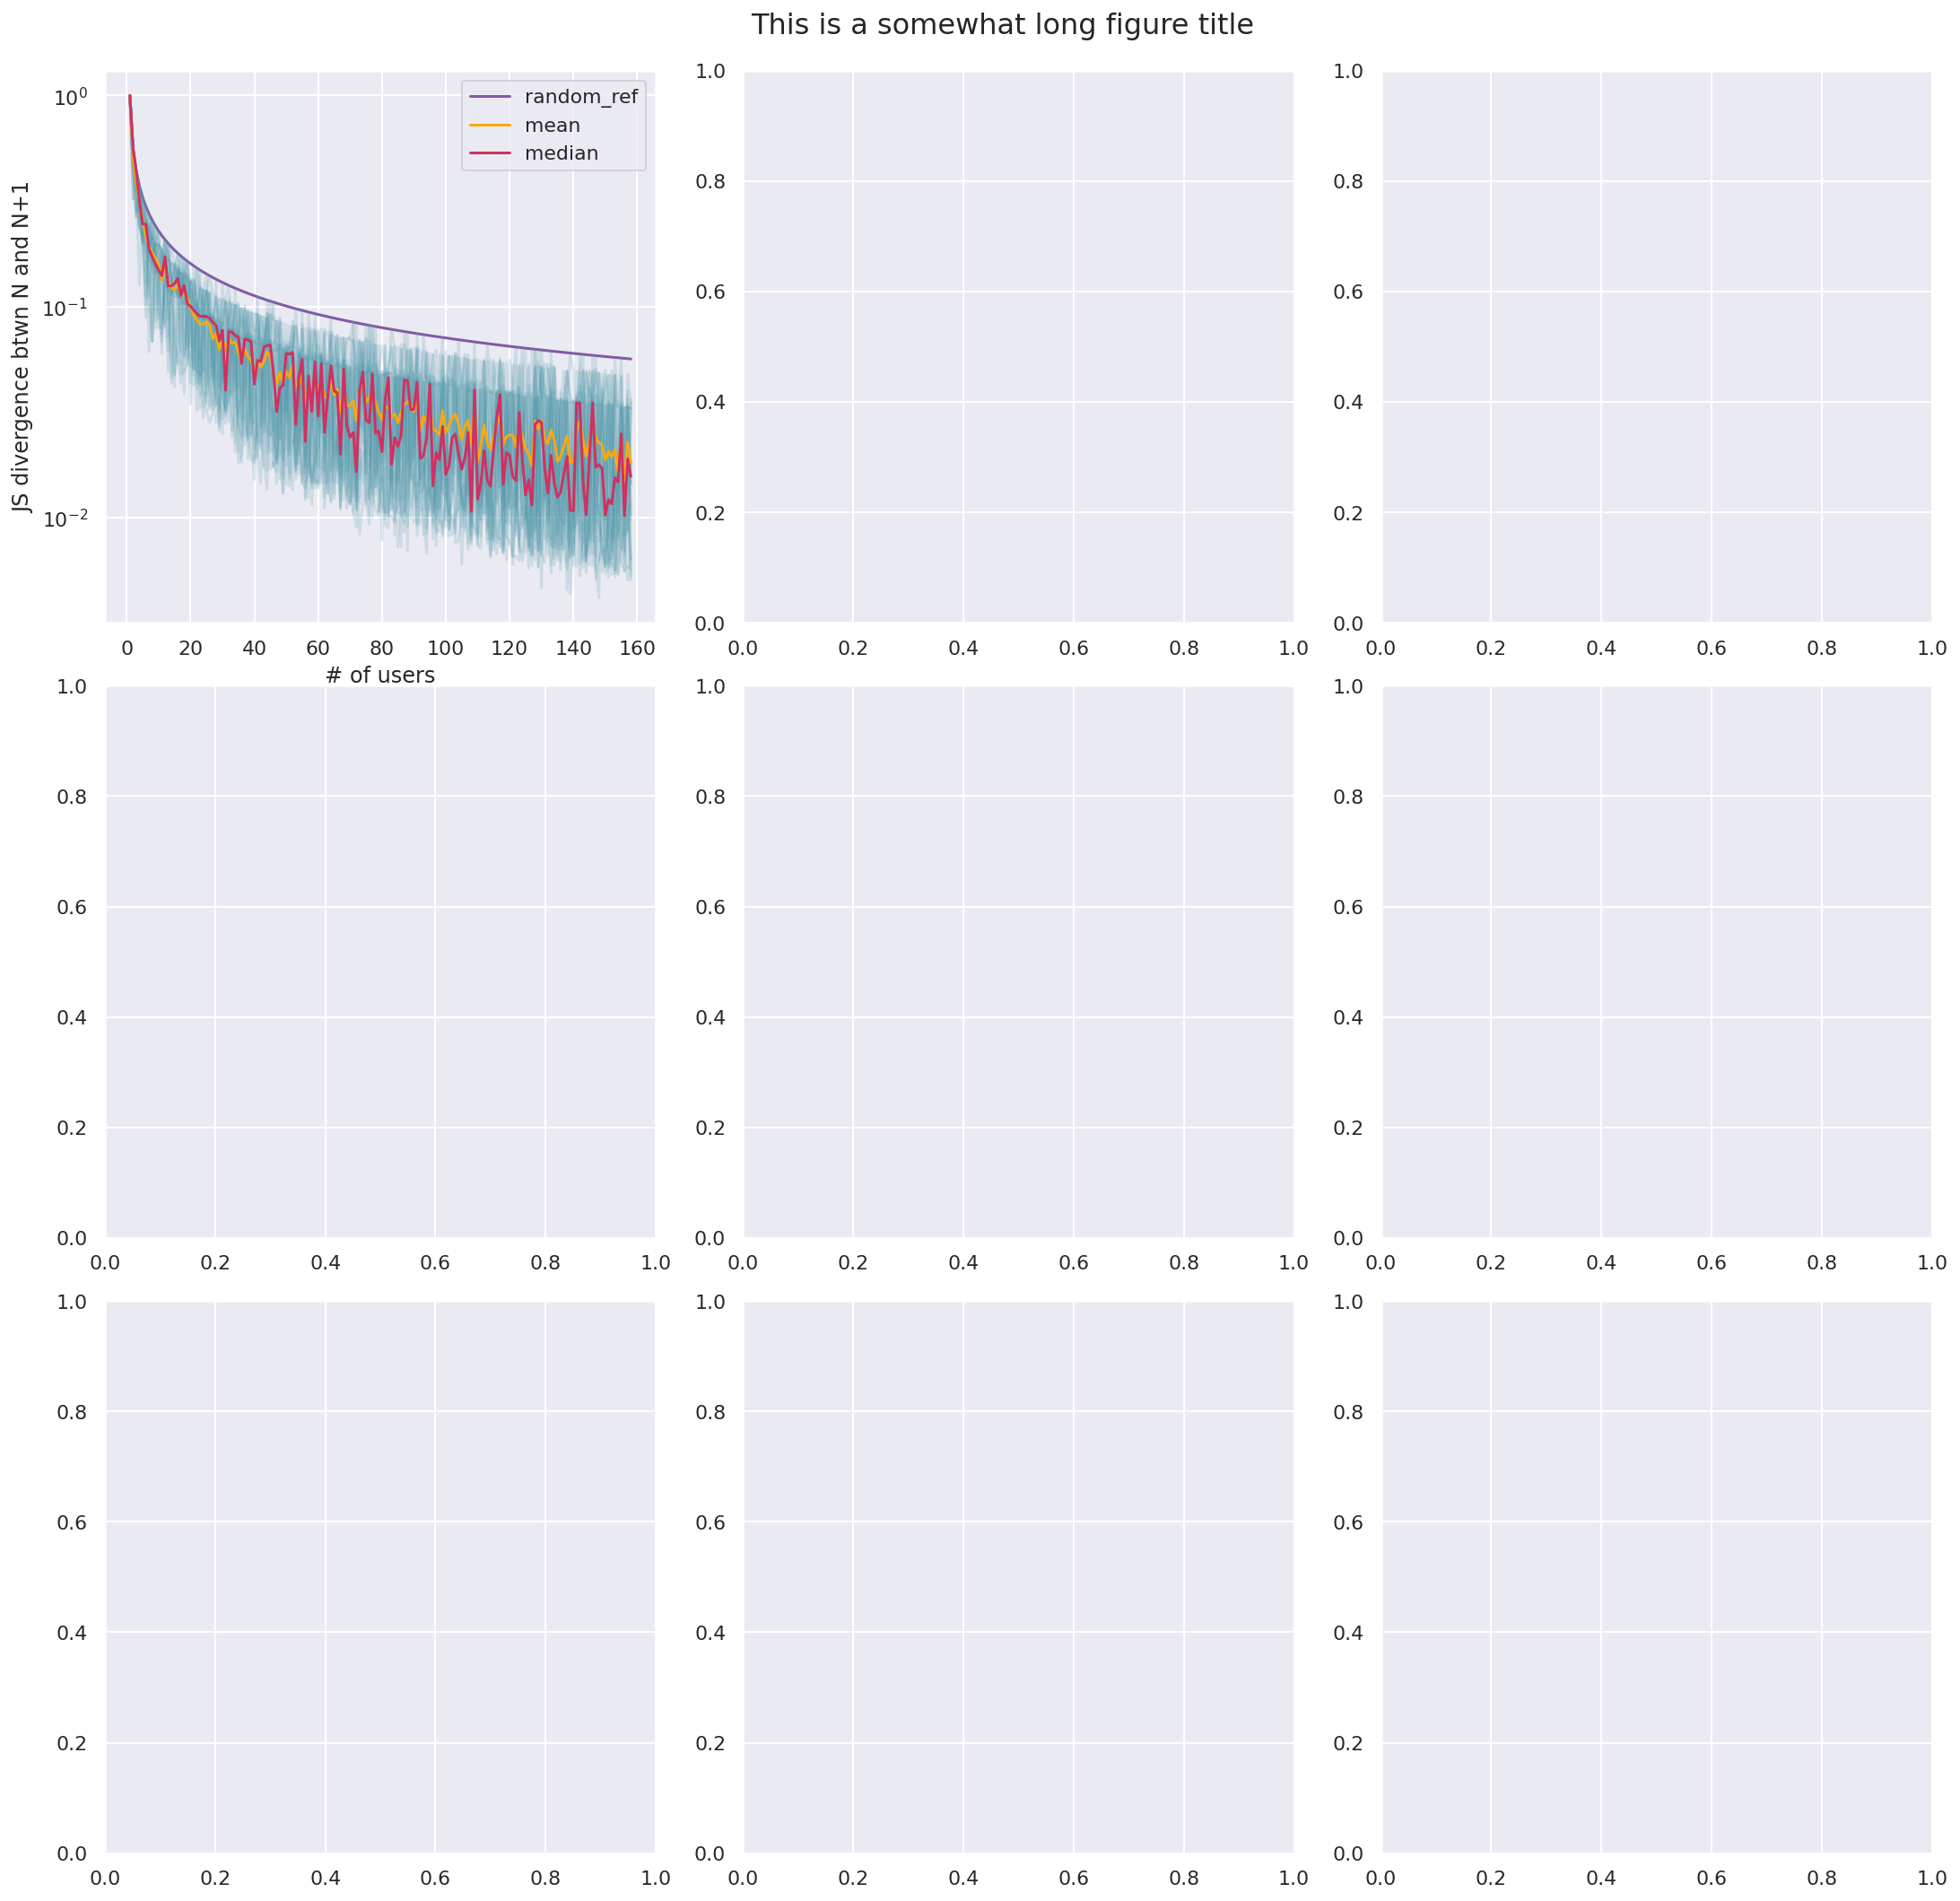

In [9]:
plot_multi_trajectories(asymp_df,log_scale=True)

## Completion Time Analysis

Median: 67 seconds
Mean: 86 seconds


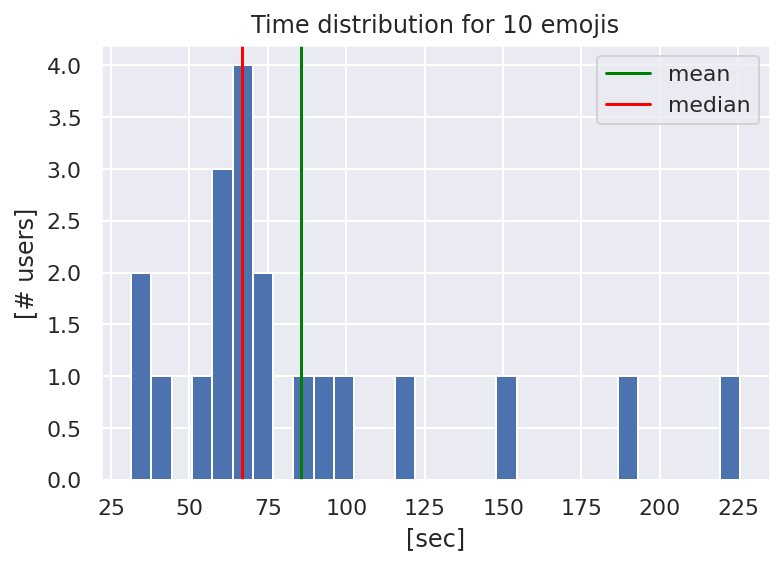

In [9]:
asymp_meta_df = read_meta(str(PILOT_0_DIR.joinpath("Emojis10_4META.csv")),asymp_df.shape[1])

fig,ax = plt.subplots(1)
plot_emoji_time(asymp_meta_df,ax)